In [2]:
import numpy as np
import os
from PIL import Image, ImageTk
from scipy import ndimage
import matplotlib.pyplot as plt

templates = []
for i in list(os.walk("./templates"))[0][2]:
#     try:
    print(i)
    templates.append(np.load("./templates/" + i))
#     except:
#         pass

template60.npy
template55.npy
template31.npy
template70.npy
template69.npy
template17.npy
template57.npy
template27.npy
template51.npy
template40.npy
template45.npy
template47.npy
template65.npy
template32.npy
template9.npy
template33.npy
template52.npy
template54.npy
template13.npy
template36.npy
template66.npy
template4.npy
template30.npy
template71.npy
template29.npy
template61.npy
template18.npy
template37.npy
template6.npy
template10.npy
template26.npy
template46.npy
template56.npy
template20.npy
template58.npy
template34.npy
template7.npy
template63.npy
template8.npy
template73.npy
template44.npy
template14.npy
template64.npy
template22.npy
template16.npy
template5.npy
template49.npy
template68.npy
template15.npy
template21.npy
template11.npy
template28.npy
template72.npy
template67.npy
template59.npy
template42.npy
template39.npy
template3.npy
template24.npy
template48.npy
template12.npy
template43.npy
template23.npy
template38.npy
template35.npy
template50.npy
template25.npy
te

In [3]:
array = np.load("2small.npy")[0]

(16, 16, 5)

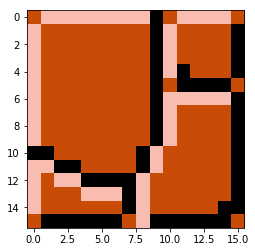

In [4]:
plt.imshow(templates[0][:,:,:3])
templates[0].shape

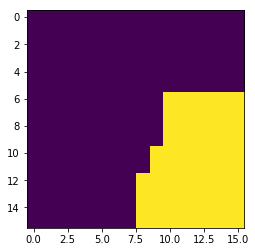

In [5]:
plt.imshow(templates[0][:,:,4])

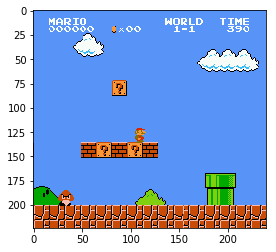

In [6]:
plt.imshow(array)


In [7]:
border_color = (4, 20, 69)

In [8]:
array.shape

(224, 240, 3)

In [21]:
tempshape = (16, 16, 5)
bax = array.shape[0] + (tempshape[0] - 1)*2
bay = array.shape[1] + (tempshape[1] - 1)*2
big_array = np.zeros((bax, bay, 3))
big_array.shape

(254, 270, 3)

In [22]:
big_array[:,:, :] = border_color
big_array = big_array.astype(np.int)
big_array.dtype

dtype('int64')

In [23]:
big_array[(tempshape[0] - 1):224+(tempshape[0] - 1),(tempshape[1] - 1):240+(tempshape[1] - 1),:] = array

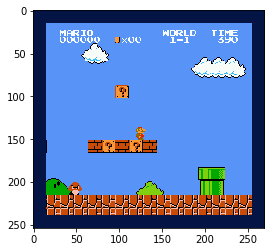

In [24]:
plt.imshow(big_array)

In [28]:
import cv2
t0 = templates[0][:,:,:3]
res = cv2.matchTemplate(big_array.astype(np.uint8), 
                        t0.astype(np.uint8), 
                        cv2.TM_CCORR_NORMED,)

In [29]:
res.shape, big_array.shape

((239, 255), (254, 270, 3))

In [49]:
a = np.ones(res.shape[0])
a*= t0.shape[0]
a[:(t0.shape[0]-1)] = range(1,t0.shape[0])
a[-(t0.shape[0]-1):] = range(t0.shape[0]-1,0,-1)
a, a.shape
b = np.ones(res.shape[1])
b*= t0.shape[1]
b[:(t0.shape[1]-1)] = range(1,t0.shape[1])
b[-(t0.shape[1]-1):] = range(t0.shape[1]-1,0,-1)
b, b.shape

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
        16., 16., 16., 16., 16., 16., 16., 16., 16.

In [50]:
# now just multiply them together :)
print(a.shape, b.shape)
a = np.expand_dims(a, -1)
b = np.expand_dims(b, -1)
print(a.shape, b.shape)
z = np.matmul(a,b.T)
print(z.shape)


(239,) (255,)
(239, 1) (255, 1)
(239, 255)


In [58]:
Z=z.max()/z

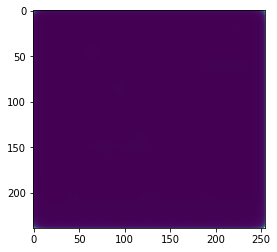

In [59]:
plt.imshow(Z*res)

In [61]:
res[0]

array([0.2993788 , 0.2906564 , 0.28265443, 0.27527896, 0.26845226,
       0.2621095 , 0.25619608, 0.26541805, 0.2652129 , 0.2599429 ,
       0.2549751 , 0.25028163, 0.24583817, 0.24162325, 0.23761795,
       0.23846653, 0.23846653, 0.23846653, 0.23846653, 0.23846653,
       0.23846653, 0.23846653, 0.23846653, 0.23846653, 0.23846653,
       0.23846653, 0.23846653, 0.23846653, 0.23846653, 0.23846653,
       0.23846653, 0.23846653, 0.23846653, 0.23846653, 0.23846653,
       0.23846653, 0.23846653, 0.23846653, 0.23846653, 0.23846653,
       0.23846653, 0.23846653, 0.23846653, 0.23846653, 0.23846653,
       0.23846653, 0.23846653, 0.23846653, 0.23846653, 0.23846653,
       0.23846653, 0.23846653, 0.23846653, 0.23846653, 0.23846655,
       0.23846655, 0.23846655, 0.23846658, 0.23846658, 0.23846658,
       0.23846658, 0.23846658, 0.23846658, 0.23846659, 0.23846659,
       0.23846659, 0.23846659, 0.23846659, 0.23846662, 0.23846662,
       0.23846662, 0.23846658, 0.23846658, 0.23846658, 0.23846

In [ ]:
#todo change the size of the border px so that it adapts to the size of the object
#also, maybe change the color of the border to the avg of that object, or maybe the opposite color

In [126]:
big_agray = np.dot(big_array, [.2989,.5870,.1140]).astype(np.uint8)

In [127]:
big_agray.shape, big_agray.dtype, big_agray.max()

((254, 270), dtype('uint8'), 250)

In [128]:
big_agray = big_agray[:239,:255]

In [129]:
big_agray.shape, res.shape

((239, 255), (239, 255))

In [130]:
res = (res *255).astype(np.uint8)
res = np.stack([big_agray,res,res], axis=-1)

In [131]:
from PIL import Image
# img = Image.fromarray(big_agray.astype(np.uint8),"RGB")
# img.save('my1.png')
img = Image.fromarray(res.astype(np.uint8),"RGB")
img.save('my2.png')

In [102]:
res.dtype, res.shape

(dtype('uint8'), (209, 225, 3, 3))

In [107]:
big_array

array([[[ 4, 20, 69],
        [ 4, 20, 69],
        [ 4, 20, 69],
        ...,
        [ 4, 20, 69],
        [ 4, 20, 69],
        [ 4, 20, 69]],

       [[ 4, 20, 69],
        [ 4, 20, 69],
        [ 4, 20, 69],
        ...,
        [ 4, 20, 69],
        [ 4, 20, 69],
        [ 4, 20, 69]],

       [[ 4, 20, 69],
        [ 4, 20, 69],
        [ 4, 20, 69],
        ...,
        [ 4, 20, 69],
        [ 4, 20, 69],
        [ 4, 20, 69]],

       ...,

       [[ 4, 20, 69],
        [ 4, 20, 69],
        [ 4, 20, 69],
        ...,
        [ 4, 20, 69],
        [ 4, 20, 69],
        [ 4, 20, 69]],

       [[ 4, 20, 69],
        [ 4, 20, 69],
        [ 4, 20, 69],
        ...,
        [ 4, 20, 69],
        [ 4, 20, 69],
        [ 4, 20, 69]],

       [[ 4, 20, 69],
        [ 4, 20, 69],
        [ 4, 20, 69],
        ...,
        [ 4, 20, 69],
        [ 4, 20, 69],
        [ 4, 20, 69]]])

In [134]:
test = np.zeros(t0.shape).astype(np.int)
test[:] = border_color
print(test)

[[[ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]]

 [[ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]]

 [[ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]]

 [[ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]]

 [[ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 4 20 69]
  [ 

In [135]:
test.shape

(16, 16, 3)

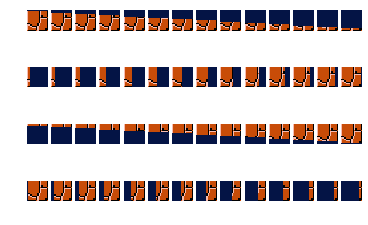

In [143]:
f, axarr = plt.subplots(4,14)
edges = []
t0 = templates[0][:,:,:3]
xdir = templates[0].shape[0]
ydir = templates[0].shape[1]
for i in range(1,xdir-1):
    j = test.copy()
    j[i:,:,:] = t0[i:,:,:]
    axarr[0,i-1].imshow(j)
    axarr[0,i-1].axis('off')
    edges.append(j)
for i in range(2,ydir):
    j = test.copy()
    j[:,:i,:] = t0[:,:i,:]
    axarr[1,i-2].imshow(j)
    axarr[1,i-2].axis('off')
    edges.append(j)
for i in range(2,xdir):
    j = test.copy()
    j[:i,:,:] = t0[:i,:,:]
    axarr[2,i-2].imshow(j)
    axarr[2,i-2].axis('off')
    edges.append(j)
for i in range(1,ydir-1):
    j = test.copy()
    j[:,i:,:] = t0[:,i:,:]
    axarr[3,i-1].imshow(j)
    axarr[3,i-1].axis('off')
    edges.append(j)
    

In [141]:
cv2.matchTemplate(test.astype(np.uint8), 
                        t0.astype(np.uint8), 
                        cv2.TM_CCORR_NORMED,)

array([[0.3022829]], dtype=float32)

In [144]:
cv2.matchTemplate(edges[7].astype(np.uint8), 
                        t0.astype(np.uint8), 
                        cv2.TM_CCORR_NORMED,)

array([[0.710527]], dtype=float32)

In [145]:
for x in templates:
    print(x.shape)

(16, 16, 5)
(16, 11, 5)
(16, 16, 5)
(16, 16, 5)
(16, 16, 5)
(9, 9, 5)
(16, 11, 5)
(16, 16, 5)
(16, 11, 5)
(32, 32, 5)
(16, 11, 5)
(16, 11, 5)
(16, 16, 5)
(16, 16, 5)
(8, 5, 5)
(16, 16, 5)
(16, 11, 5)
(16, 11, 5)
(16, 16, 5)
(16, 16, 5)
(16, 16, 5)
(9, 9, 5)
(16, 16, 5)
(16, 16, 5)
(16, 16, 5)
(16, 16, 5)
(9, 8, 5)
(16, 16, 5)
(9, 9, 5)
(7, 7, 5)
(24, 64, 5)
(16, 11, 5)
(16, 11, 5)
(9, 8, 5)
(16, 16, 5)
(16, 16, 5)
(9, 9, 5)
(16, 16, 5)
(24, 32, 5)
(16, 16, 5)
(16, 11, 5)
(16, 16, 5)
(16, 16, 5)
(9, 8, 5)
(16, 16, 5)
(9, 8, 5)
(16, 11, 5)
(16, 16, 5)
(16, 16, 5)
(4, 8, 5)
(16, 16, 5)
(16, 16, 5)
(16, 16, 5)
(16, 16, 5)
(16, 16, 5)
(16, 11, 5)
(32, 32, 5)
(9, 9, 5)
(9, 9, 5)
(16, 11, 5)
(16, 16, 5)
(16, 11, 5)
(9, 9, 5)
(32, 32, 5)
(16, 16, 5)
(16, 11, 5)
(9, 9, 5)
(9, 9, 5)
(16, 16, 5)
(16, 11, 5)
(9, 9, 5)
(16, 32, 5)


In [ ]:
# speed tip: build a template hierarchy